# Exercise 5.01: Implementing K-Means in scikit-learn

In this exercise, we will be plotting a dataset in a two-dimensional plane and performing clustering on it using the k-means algorithm.

The following steps will help you complete this exercise:

1.- Create an artificial dataset as a NumPy array to demonstrate the k-means algorithm. Use following data:

```
[[1, 1], [1, 1.5], [2, 2], \
 [8, 1], [8, 0], [8.5, 1], \
 [6, 1], [1, 10], [1.5, 10], \
 [1.5, 9.5], [10, 10], [1.5, 8.5]]
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

datos = np.array([[1, 1], [1, 1.5], [2, 2], \
 [8, 1], [8, 0], [8.5, 1], \
 [6, 1], [1, 10], [1.5, 10], \
 [1.5, 9.5], [10, 10], [1.5, 8.5]])

datos

array([[ 1. ,  1. ],
       [ 1. ,  1.5],
       [ 2. ,  2. ],
       [ 8. ,  1. ],
       [ 8. ,  0. ],
       [ 8.5,  1. ],
       [ 6. ,  1. ],
       [ 1. , 10. ],
       [ 1.5, 10. ],
       [ 1.5,  9.5],
       [10. , 10. ],
       [ 1.5,  8.5]])

2.- Plot these data points in the two-dimensional plane using `matplotlib.pyplot`.

Output:

![Figure 5.4](img/fig5_04.jpg)

  > **Hint**  
  > Use the `transpose` array method to get the values of the first feature and the second feature. We could also use proper array indexing to access these columns: `dataPoints[:,0]`, which is equivalent to `dataPoints.transpose()[0]`.

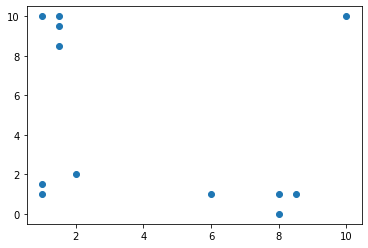

In [4]:
plt.scatter(datos[:,0], datos[:,1])
plt.show()

3.- Define `k=3` in the k-means algorithm. We expect a cluster in the bottom-left, top-left, and bottom-right corners of the graph. 

  > **Hint**  
  > Add `random_state = 8` in order to reproduce the same results

In [7]:
clustering = KMeans(n_clusters=3, random_state=8).fit(datos)

4.- Once the clustering is done, access the center point of each cluster.

  > **Hint**  
  > Use the `.cluster_centers_` attribute
  
Output:

```
array([[7.625     , 0.75      ],
       [3.1       , 9.6       ],
       [1.33333333, 1.5       ]])
```

In [11]:
center= clustering.cluster_centers_
center

array([[7.625     , 0.75      ],
       [3.1       , 9.6       ],
       [1.33333333, 1.5       ]])

This output is showing the coordinates of the center of our three clusters. If you look back at Figure 5.4, you will see that the center points of the clusters appear to be in the bottom-left, $(1.3, 1.5)$, the top-left $(3.1, 9.6)$, and the bottom-right $(7.265, 0.75)$ corners of the graph. The x coordinate of the top-left cluster is $3.1$, most likely because it contains our outlier data point at $[10, 10]$.

5.- Find out which data point belongs to which cluster, we must query the `labels_` property of the k-means classifier.

Output:

```
array([2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)
```

In [12]:
label=clustering.labels_
label

array([2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

6.- Plot the data.

Output:

![Figure 5.5](img/fig5_05.jpg)

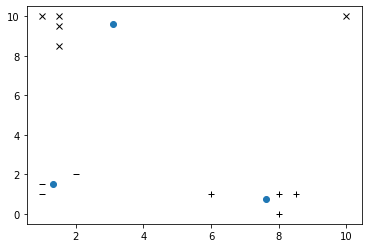

In [13]:
plt.scatter(center[:,0],center[:,1])

for i,v in enumerate(datos):
  plt.plot(v[0],v[1],['k+','kx','k_'][label[i]])

plt.show()  

we used the matplotlib library to plot the data points with the center of each coordinate. Each cluster has its marker (x, +, and -), and its center is represented by a filled circle.

7.-  Reuse the same code and choose only two clusters instead of three.

Output:

![Figure 5.6](img/fig5_06.jpg)

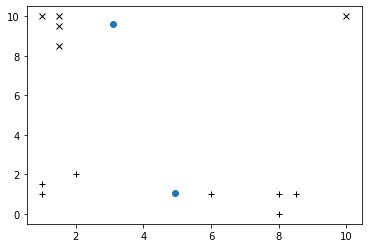

In [14]:
clustering = KMeans(n_clusters=2, random_state=8).fit(datos)
center= clustering.cluster_centers_
label=clustering.labels_

plt.scatter(center[:,0],center[:,1])

for i,v in enumerate(datos):
  plt.plot(v[0],v[1],['k+','kx','k_'][label[i]])

plt.show()  

This time, we only have x and + points, and we can clearly see a bottom cluster and a top cluster. Interestingly, the top cluster in the second try contains the same points as the top cluster in the first try. The bottom cluster of the second try consists of the data points joining the bottom-left and the bottom-right clusters of the first try.

8.- Use the k-means model to predict the label of new data points $[[5, 5], [0, 10]]$. The output will be an array containing the cluster numbers belonging to each data point.

Output

```
array([0, 1], dtype=int32)
```

In [16]:
prediccion= clustering.predict([[5,5],[0,10]])
prediccion

array([0, 1], dtype=int32)

This means that our first point belongs to the first cluster (at the bottom) and the second point belongs to the second cluster (at the top).